# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


# Creating data to view and fit

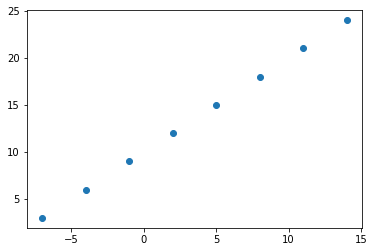

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our numpyt arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [6]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model usiong the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 907ms/step - loss: 19.4154 - mae: 19.4154
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 19.1342 - mae: 19.1342
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 18.8529 - mae: 18.8529
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 18.5717 - mae: 18.5717
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 18.2904 - mae: 18.2904
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 18.0092 - mae: 18.0092
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 17.7279 - mae: 17.7279
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 17.4467 - mae: 17.4467
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 17.1654 - mae: 17.1654
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 16.8842 - mae: 16.8842
Epoch 11/50
1/1 [==============================] - 0s 14ms

In [7]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Try and make a prediction using our model
model.predict([37.0])

1/1 [==============================] - 0s 260ms/step


array([[29.239511]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all caled neurons), within each of the hidden layers, change the activation function of each layers.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [9]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.4964 - mae: 13.4964
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 12.8379 - mae: 12.8379
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 12.1768 - mae: 12.1768
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5124 - mae: 11.5124
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 10.8429 - mae: 10.8429
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.1657 - mae: 10.1657
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4771 - mae: 9.4771
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.7737 - mae: 8.7737
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.0515 - mae: 8.0515
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3070 - mae: 7.3070
Epoch 11/100
1/1 [==============================] - 0s 24ms

In [10]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 321ms/step


array([[27.204128]], dtype=float32)

2/2 [==============================] - 0s 5ms/step


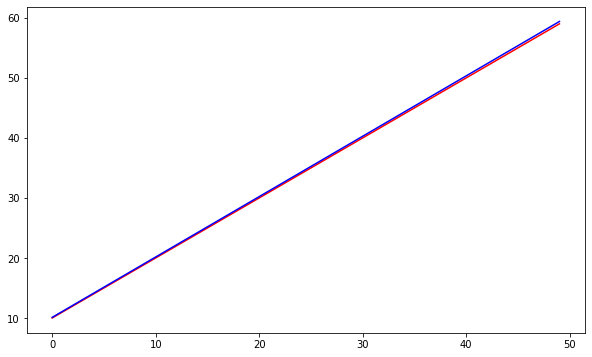

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(0, 50, 1)
ax.plot(x, x + 10, c="r")
ax.plot(x, model.predict(x), c="b");

# Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... There are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize::
* the data = what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [13]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

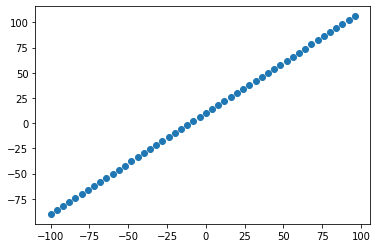

In [15]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this set of data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has elarned, this set is typically 10-15% of the total data available.

In [16]:
# Check the length of how many samples we have
len(X)

50

In [49]:
# Split the data into train and test sets
X_train = X[:40] # 80% of the data
y_train = y[:40]
X_test = X[40:] # last 20% of data
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data split intro training and test sets... let's visualize it again.

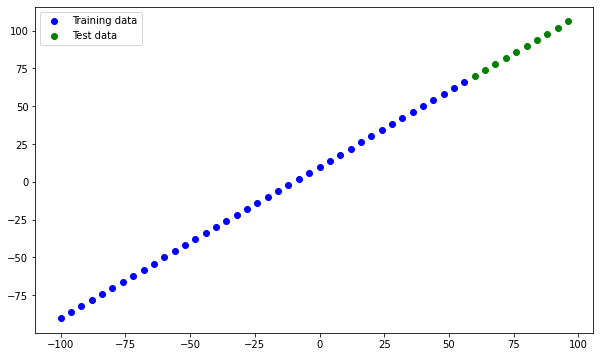

In [39]:
plt.figure(figsize=(10, 6))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

In [40]:
# Let's have a look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

### Visualizing the model

In [82]:
# Let's create a model which builds automatically the input_shape argument in the first layer
tf.random.set_seed(42)

# Creaet a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [83]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [84]:
# Lets fit our model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [85]:
# Get a summary of our model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


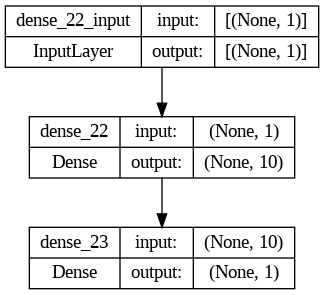

In [86]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth vesrus your model predictions)

In [87]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [88]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 73ms/step


array([[ 70.46091 ],
       [ 75.042336],
       [ 79.62378 ],
       [ 84.205215],
       [ 88.78665 ],
       [ 93.36809 ],
       [ 97.949524],
       [102.53095 ],
       [107.11239 ],
       [111.693825]], dtype=float32)

In [122]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predicted data")
  plt.legend();

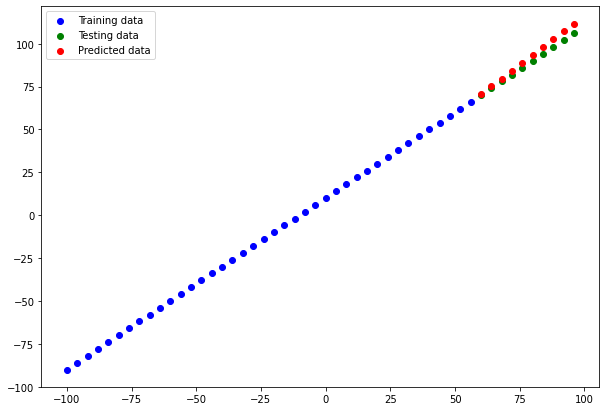

In [95]:
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of me model's predictions"
* MSE - mean square error, "square the average errors"

In [91]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 221ms/step - loss: 3.0774 - mae: 3.0774


[3.077366590499878, 3.077366590499878]

In [113]:
y_preds = tf.squeeze(y_preds)

In [114]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0773666>

In [116]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.259239>

In [152]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_preds))
  
def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_preds))

In [118]:
mse(y_test, y_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=12.259239>

In [119]:
mae(y_test, y_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0773666>

### Running experiments to improve our model

1. Get more data - get more examples for the model to train on
2. Make your model larger (using a more complex model) - might come in a form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - two layers trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`**

In [120]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 47.0604 - mae: 47.0604
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 15.6819 - mae: 15.6819
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 15.0353 - mae: 15.0353
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 8.1562 - mae: 8.1562
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 10.6929 - mae: 10.6929
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8939 - mae: 9.8939
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.9593 - mae: 8.9593
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.0867 - mae: 9.0867
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 19.7064 - mae: 19.7064
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 10.6525 - mae: 10.6525
Epoch 11/100
2/2 [==============================] - 0s 14

1/1 [==============================] - 0s 26ms/step


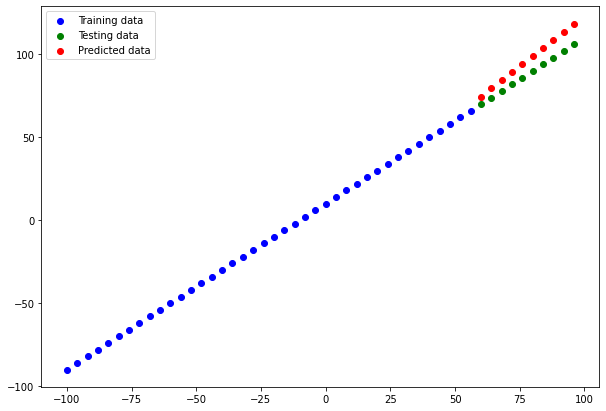

In [123]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [127]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.612019>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.67828>)

**Build `model_2`**
* 2 dense layers trained for 100 epochs

In [146]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [147]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 13.3452 - mse: 188.1946


[13.345245361328125, 188.19461059570312]

In [148]:
# Plot predictions
y_preds_2 = model_2.predict(X_test) 
y_preds_2

1/1 [==============================] - 0s 62ms/step


array([[ 78.36644 ],
       [ 83.47284 ],
       [ 88.57924 ],
       [ 93.685646],
       [ 98.79203 ],
       [103.898445],
       [109.004845],
       [114.111244],
       [119.21766 ],
       [124.32404 ]], dtype=float32)

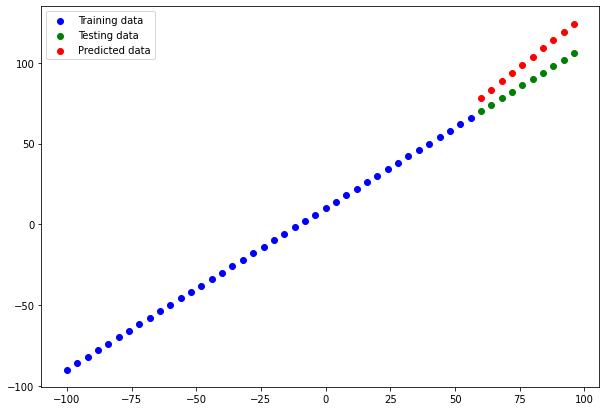

In [149]:
plot_predictions(predictions=y_preds_2)

In [154]:
# MAE and MSE
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.3452425>,
 <tf.Tensor: shape=(), dtype=float32, numpy=188.19455>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [159]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 2s 13ms/step - loss: 71.4580 - mse: 7050.1768
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 70.7519 - mse: 6911.2993
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 70.0704 - mse: 6776.8687
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 69.3785 - mse: 6642.0298
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 68.7000 - mse: 6513.3892
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 68.0162 - mse: 6382.1338
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 67.3271 - mse: 6250.4971
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 66.6130 - mse: 6112.1709
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 65.9507 - mse: 5994.1045
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 65.2818 - mse: 5871.9268
Epoch 11/500
2/2 [=================

In [160]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 239ms/step - loss: 9.6832 - mse: 94.3017


[9.683211326599121, 94.30171203613281]

1/1 [==============================] - 0s 150ms/step


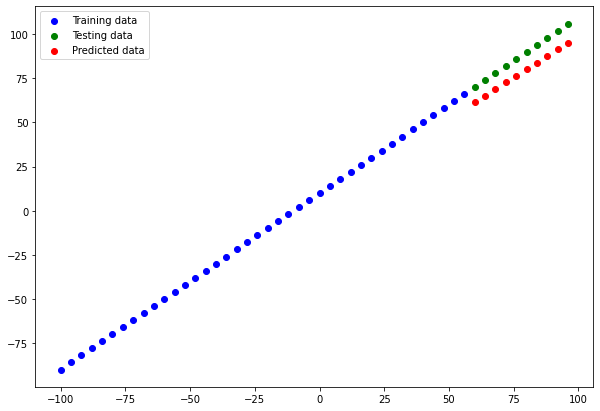

In [161]:
# Make preedictions and plot themn
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [162]:
mse_3 = mse(y_test, y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=9.683211>,
 <tf.Tensor: shape=(), dtype=float32, numpy=94.3017>)

### Comparing our experiments

We've run a few experiments, let's compare them.

In [163]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.612019,80.678284
1,model_2,13.345243,188.194550
2,model_3,9.683211,94.301697


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google colab such as in a web application or a mobile app.

There are two main formats we can save out models to:
1. The SavedModel format
2. The HDF5 format

In [165]:
# Save model using the SavedModel format
model_1.save("best_model_SavedModel_format")

In [166]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [167]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [168]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Compare model_2 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [174]:
mae(y_true=y_test, y_preds=model_1_preds) == mae(y_true=y_test, y_preds=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [175]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Check to see if loaded .h5 model predictrions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 140ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

# A larger example

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# Let's try to one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [3]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [4]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
590,58,29.000,0,1,0,1,0,0,0,0,1
601,51,31.635,0,0,1,1,0,0,1,0,0
1289,44,34.320,1,0,1,1,0,0,0,1,0
1135,50,28.120,3,1,0,1,0,0,1,0,0
679,49,23.180,2,1,0,1,0,0,1,0,0


In [6]:
y_train.head()

590     11842.44200
601      9174.13565
1289     7147.47280
1135    11085.58680
679     10156.78320
Name: charges, dtype: float64

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8581.3154 - mae: 8581.3154
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7747.8818 - mae: 7747.8818
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7573.8433 - mae: 7573.8433
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7645.1846 - mae: 7645.1846
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7402.3115 - mae: 7402.3115
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7532.6787 - mae: 7532.6787
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7458.8262 - mae: 7458.8262
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8003.2280 - mae: 8003.2280
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7335.3657 - mae: 7335.3657
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7569.9575 - mae: 7569.9575

In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7214.4902 - mae: 7214.4902


[7214.490234375, 7214.490234375]

Right now it looks like our model isn't performing too well... let's try to improve it.

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. Other experiments

In [54]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Setup EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# Fit the model
history = insurance_model_2.fit(X_train, y_train, callbacks=[callback], epochs=300, verbose=1)

Epoch 1/300
34/34 [==============================] - 3s 6ms/step - loss: 13181.7402 - mae: 13181.7402
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 9666.5205 - mae: 9666.5205
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 7297.7070 - mae: 7297.7070
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 7118.1177 - mae: 7118.1177
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 6999.0923 - mae: 6999.0923
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 6763.1733 - mae: 6763.1733
Epoch 7/300
34/34 [==============================] - 0s 11ms/step - loss: 6530.5610 - mae: 6530.5610
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 6339.1196 - mae: 6339.1196
Epoch 9/300
34/34 [==============================] - 0s 8ms/step - loss: 6258.1406 - mae: 6258.1406
Epoch 10/300
34/34 [==============================] - 0s 5ms/step - loss: 6126.3110 - mae: 6126.3

In [55]:
# Evaluate on train data
insurance_model_2.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2092.1716 - mae: 2092.1716


[2092.171630859375, 2092.171630859375]

In [56]:
# Evaluate on test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 2067.4529 - mae: 2067.4529


[2067.452880859375, 2067.452880859375]

Text(0.5, 0, 'epochs')

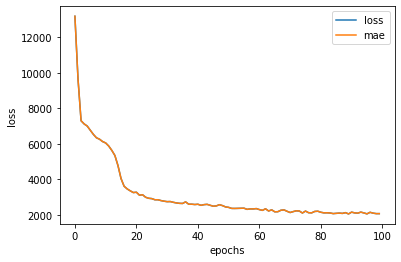

In [57]:
# Plot history (training curve/loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standarization)

 In terms of scaling values, neural networks tend to prefer normalization.

 If you're not sure which one to use, use both to see which works better.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow some classes from sklearn

In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build opur train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the columnt transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [61]:
# what does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [63]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [64]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.
Now let's build a neural network model on our normalized data

In [81]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# Create a model
insurance_model_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Setup callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Compile the model
insurance_model_norm.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                             metrics=["mae"])

# Fit the model
history = insurance_model_norm.fit(X_train_normal, 
                                   y_train, 
                                   epochs=300, 
                                   verbose=1, 
                                   callbacks=[callback])

Epoch 1/300
34/34 [==============================] - 3s 2ms/step - loss: 13286.7373 - mae: 13286.7373
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 10185.5742 - mae: 10185.5742
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 7673.1597 - mae: 7673.1597
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 6484.8833 - mae: 6484.8833
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 4816.0542 - mae: 4816.0542
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 3731.7854 - mae: 3731.7854
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 3391.6460 - mae: 3391.6460
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 3328.9043 - mae: 3328.9043
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3313.5630 - mae: 3313.5630
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3373.4910 - mae: 3373.

In [82]:
# Evaluate model on train data
insurance_model_norm.evaluate(X_train_normal, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 2084.5371 - mae: 2084.5371


[2084.537109375, 2084.537109375]

In [83]:
# Evaluate model on test data
insurance_model_norm.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1845.6003 - mae: 1845.6003


[1845.600341796875, 1845.600341796875]

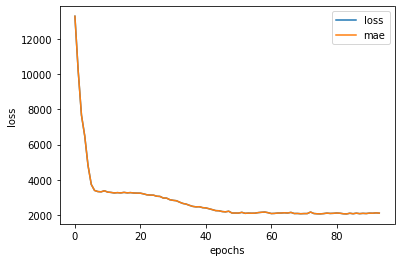

In [84]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();